<a href="https://colab.research.google.com/github/trishabhogawar/BigMart_Sales/blob/main/final_big_mart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might n

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('/content/train_v9rqX0R.csv')
test = pd.read_csv('/content/test_AbJTz2l.csv')
ss=pd.read_csv('/content/sample_submission_8RXa3c6.csv')

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
train.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
test.isna().sum()

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


In [3]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [4]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [5]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'Regular': 'Regular', 'reg': 'Regular',
                                                               'Low Fat': 'Low Fat', 'low fat': 'Low Fat', 'LF': 'Low Fat'})
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'Regular': 'Regular', 'reg': 'Regular',
                                                             'Low Fat': 'Low Fat', 'low fat': 'Low Fat', 'LF': 'Low Fat'})

In [ ]:
train['Item_Visibility'].unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.03518627, 0.14522065,
       0.04487828])

In [ ]:
test['Item_Visibility'].unique()

array([0.00756484, 0.03842768, 0.09957491, ..., 0.1429909 , 0.07352856,
       0.10472015])

In [6]:
train['Item_Identifier'] = train['Item_Identifier'].str.slice(0,2)
test['Item_Identifier'] = test['Item_Identifier'].str.slice(0,2)

In [7]:
train['running'] = 2013 - train['Outlet_Establishment_Year']
test['running'] = 2013 - test['Outlet_Establishment_Year']

In [7]:
train['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [8]:
test['Outlet_Identifier'].unique()

array(['OUT049', 'OUT017', 'OUT010', 'OUT027', 'OUT046', 'OUT018',
       'OUT045', 'OUT019', 'OUT013', 'OUT035'], dtype=object)

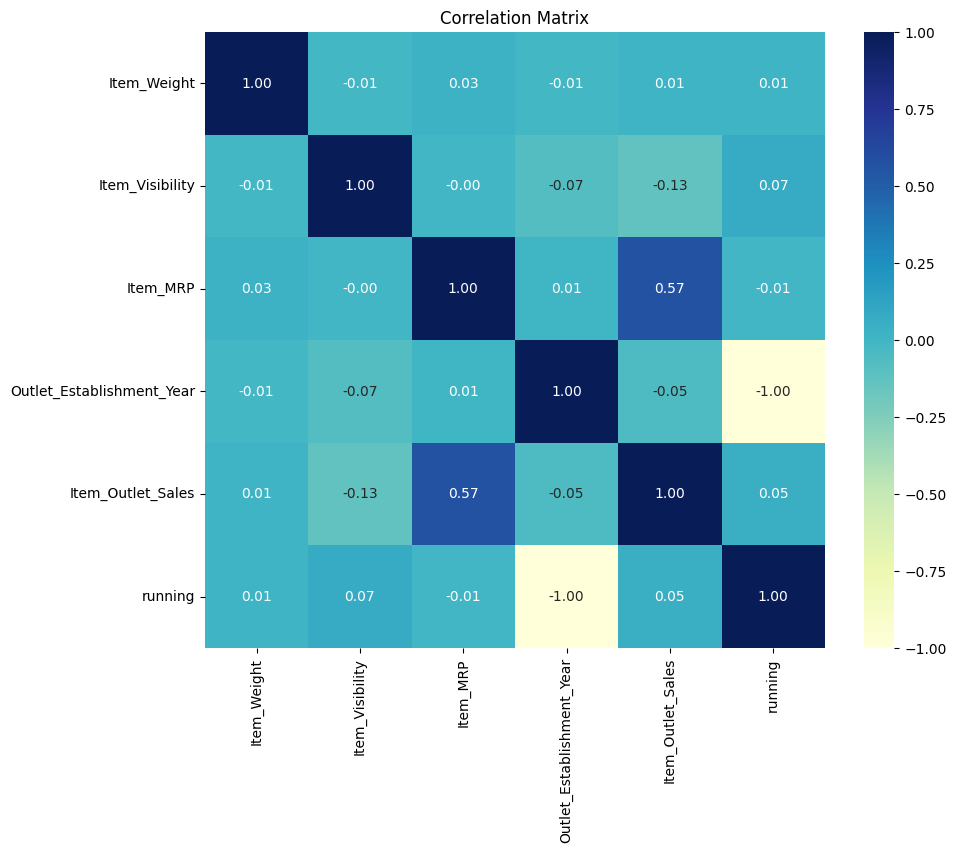

In [ ]:
numeric_features = train.select_dtypes(include=np.number).columns
correlation_matrix = train[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
train['Item_Identifier'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

<Axes: xlabel='Item_MRP', ylabel='Density'>

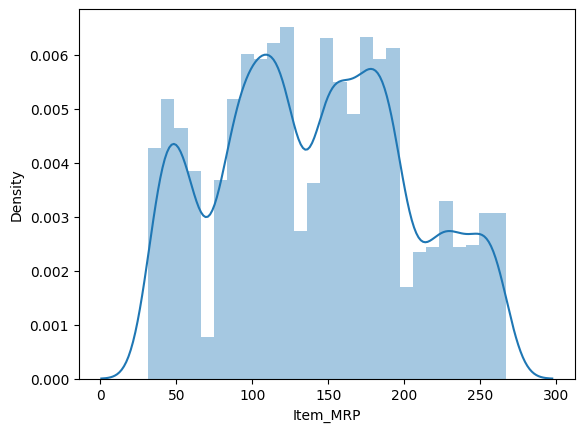

In [ ]:
sns.distplot(train['Item_MRP'])

<Axes: xlabel='Item_MRP', ylabel='Density'>

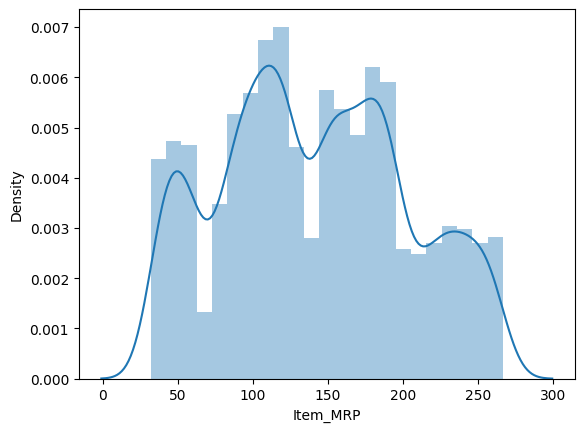

In [ ]:
sns.distplot(test['Item_MRP'])

<Axes: xlabel='Item_Weight', ylabel='Density'>

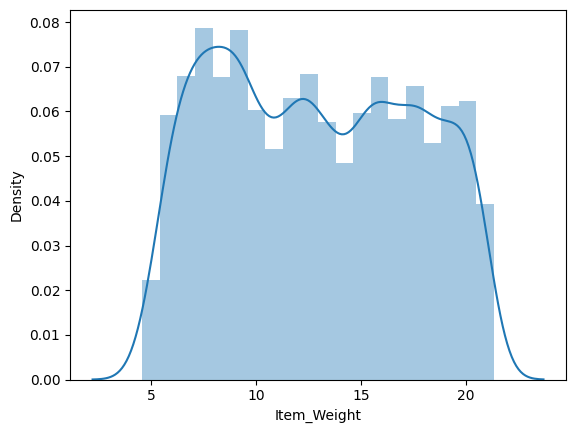

In [ ]:
sns.distplot(train['Item_Weight'])

In [9]:
bins = [0, 5, 10, 20, float('inf')]
labels = ['<5', '5-10', '10-20', '>20']

train['Weight_Category'] = pd.cut(train['Item_Weight'], bins=bins, labels=labels, right=False).astype('object')
test['Weight_Category'] = pd.cut(test['Item_Weight'], bins=bins, labels=labels, right=False).astype('object')

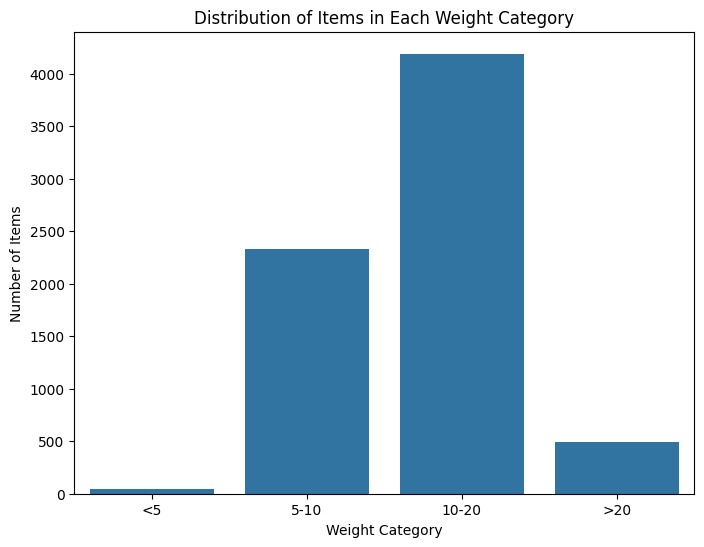

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Weight_Category', order=['<5', '5-10', '10-20', '>20'])
plt.title("Distribution of Items in Each Weight Category")
plt.xlabel("Weight Category")
plt.ylabel("Number of Items")
plt.show()

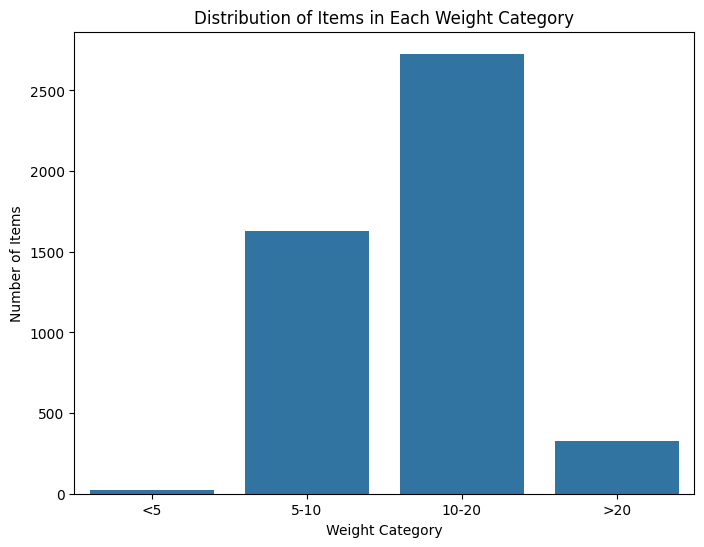

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=test, x='Weight_Category', order=['<5', '5-10', '10-20', '>20'])
plt.title("Distribution of Items in Each Weight Category")
plt.xlabel("Weight Category")
plt.ylabel("Number of Items")
plt.show()

<Axes: xlabel='Item_Visibility', ylabel='Density'>

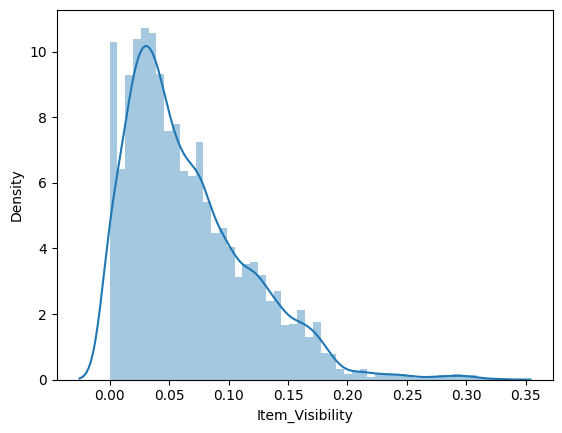

In [ ]:
sns.distplot(train['Item_Visibility'])

<Axes: xlabel='Item_Visibility', ylabel='Density'>

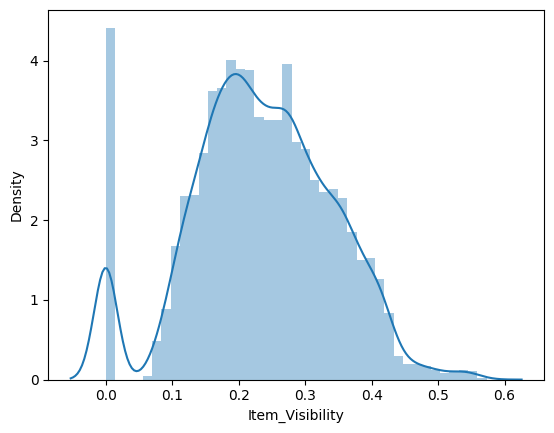

In [ ]:
sns.distplot(np.sqrt(train['Item_Visibility']))

In [9]:
train['Item_Visibility'] = np.sqrt(train['Item_Visibility'])
test['Item_Visibility'] = np.sqrt(test['Item_Visibility'])

In [10]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0, train['Item_Visibility'].mean())
test['Item_Visibility'] = test['Item_Visibility'].replace(0, test['Item_Visibility'].mean())

<Axes: xlabel='Item_Visibility', ylabel='Density'>

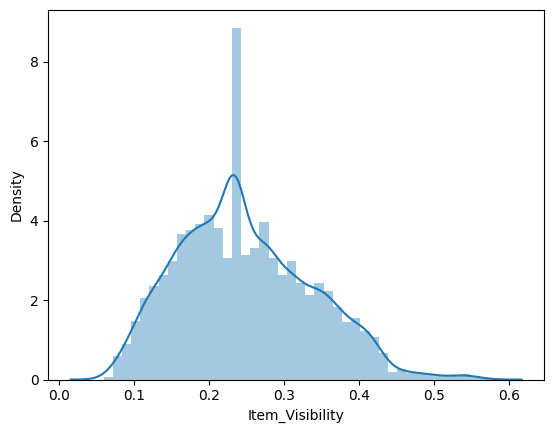

In [ ]:
sns.distplot(train['Item_Visibility'])

In [ ]:
train['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

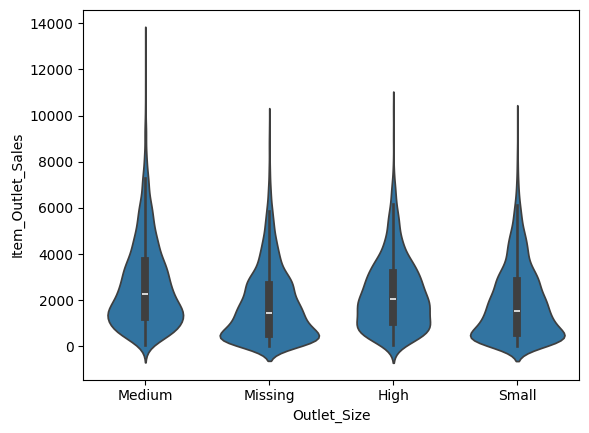

In [ ]:
sns.violinplot(x=train.Outlet_Size.fillna("Missing"),y='Item_Outlet_Sales',data=train)

In [11]:
train.groupby('Outlet_Type')['Outlet_Size'].value_counts(dropna=False)
train.groupby('Outlet_Location_Type')['Outlet_Size'].value_counts(dropna=False)

Outlet_Location_Type  Outlet_Size
Tier 1                Small          1458
                      Medium          930
Tier 2                NaN            1855
                      Small           930
Tier 3                Medium         1863
                      High            932
                      NaN             555
Name: count, dtype: int64

In [12]:
train.loc[(test['Outlet_Location_Type'] == 'Tier 2') & (train['Outlet_Size'].isna()), 'Outlet_Size'] = 'Small'
train.loc[(test['Outlet_Location_Type'] == 'Tier 3') & (train['Outlet_Size'].isna()), 'Outlet_Size'] = 'Medium'
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)


In [ ]:
train.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
train['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [ ]:
test['Outlet_Size'].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [13]:
test.groupby('Outlet_Type')['Outlet_Size'].value_counts(dropna=False)
test.groupby('Outlet_Location_Type')['Outlet_Size'].value_counts(dropna=False)

Outlet_Location_Type  Outlet_Size
Tier 1                Small           972
                      Medium          620
Tier 2                NaN            1236
                      Small           620
Tier 3                Medium         1242
                      High            621
                      NaN             370
Name: count, dtype: int64

In [14]:
test.loc[(test['Outlet_Location_Type'] == 'Tier 2') & (test['Outlet_Size'].isna()), 'Outlet_Size'] = 'Small'
test.loc[(test['Outlet_Location_Type'] == 'Tier 3') & (test['Outlet_Size'].isna()), 'Outlet_Size'] = 'Medium'

In [15]:
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0], inplace=True)
test['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [ ]:
train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [ ]:
test['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

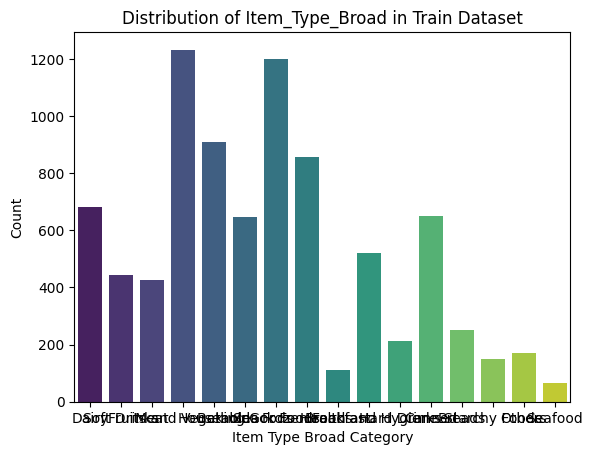

In [ ]:
sns.countplot(x='Item_Type', data=train, palette="viridis")
plt.title('Distribution of Item_Type_Broad in Train Dataset')
plt.xlabel('Item Type Broad Category')
plt.ylabel('Count')
plt.show()

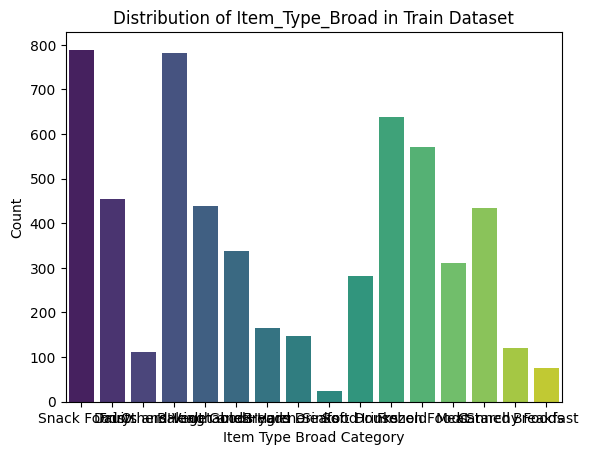

In [ ]:
sns.countplot(x='Item_Type', data=test, palette="viridis")
plt.title('Distribution of Item_Type_Broad in Train Dataset')
plt.xlabel('Item Type Broad Category')
plt.ylabel('Count')
plt.show()

In [16]:
def map_item_type(item_type):
    if item_type in ['Dairy', 'Meat', 'Fruits and Vegetables', 'Baking Goods',
                     'Snack Foods', 'Frozen Foods', 'Breakfast', 'Breads',
                     'Starchy Foods', 'Seafood', 'Canned']:
        return 'Food'
    elif item_type in ['Soft Drinks', 'Hard Drinks']:
        return 'Drink'
    else:
        return 'Non-Consumable'

train['Item_Type'] = train['Item_Type'].apply(map_item_type)
test['Item_Type'] = test['Item_Type'].apply(map_item_type)

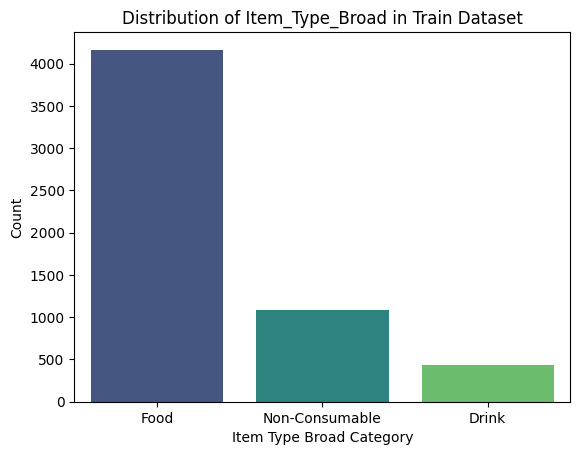

In [ ]:
sns.countplot(x='Item_Type', data=test, palette="viridis")
plt.title('Distribution of Item_Type_Broad in Train Dataset')
plt.xlabel('Item Type Broad Category')
plt.ylabel('Count')
plt.show()

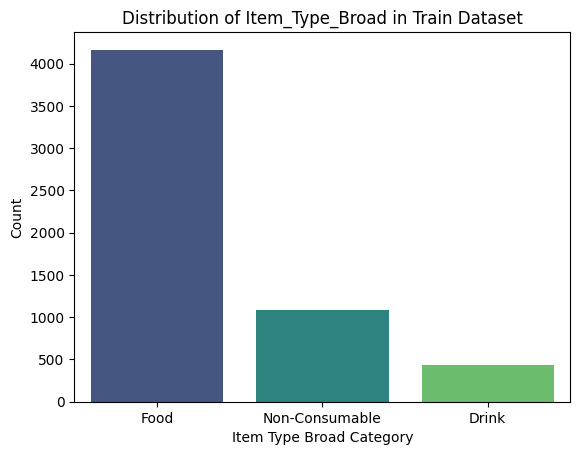

In [ ]:
sns.countplot(x='Item_Type', data=test, palette="viridis")
plt.title('Distribution of Item_Type_Broad in Train Dataset')
plt.xlabel('Item Type Broad Category')
plt.ylabel('Count')
plt.show()

In [20]:
from autogluon.tabular import TabularPredictor
label = 'Item_Outlet_Sales'
predictor = TabularPredictor(label=label, eval_metric='root_mean_squared_error').fit(
    train_data=train,
    presets='best_quality',
    num_stack_levels=1
)

predictions = predictor.predict(test)

No path specified. Models will be saved in: "AutogluonModels/ag-20241109_131346"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.44 GB / 12.67 GB (82.4%)
Disk Space Avail:   65.69 GB / 107.72 GB (61.0%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

(_ray_fit pid=11575) [1000]	valid_set's rmse: 1052.33


(_dystack pid=6552) 	-1085.2809	 = Validation score   (-root_mean_squared_error)
(_dystack pid=6552) 	32.12s	 = Training   runtime
(_dystack pid=6552) 	0.44s	 = Validation runtime
(_dystack pid=6552) Fitting model: LightGBM_BAG_L2 ... Training model for up to 235.81s of the 235.74s of remaining time.
(_dystack pid=6552) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
(_ray_fit pid=11575) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=11575) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=11575)  [repeated 2x across cluster]
(_ray_fit pid=11575) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=11575) This will raise in a future version.
(_ray_fit pid=11575)   warnings.warn(msg, FutureWarning)
(_ray_fit pid=11637) /usr/local/lib/python3.10/dist-packages/dask/datafr

In [21]:
ss['Item_Outlet_Sales'] = predictions
ss.to_csv('autogluon_sales_predictions3.csv', index=False)
print("Predictions saved to 'autogluon_sales_predictions_stacked.csv'")

Predictions saved to 'autogluon_sales_predictions_stacked.csv'
